Imports

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

**Let's define our objective functions**

In [3]:
def objective_eggholder(x1,x2):
  ## Find the global minimum [f(512, 404.2319) = -959.6407]
  a=np.sqrt(np.fabs(x2+x1/2+47))
  b=np.sqrt(np.fabs(x1-(x2+47)))
  c=-(x2+47)*np.sin(a)-x1*np.sin(b)
  return c

def objective_levi_n13(x1, x2):
  ## Find the global minimum [f(1, 1) = 0]
  c = (np.sin(3*np.pi*x1) ** 2) + ((x1-1)**2) * (1+np.sin(3*np.pi*x2) ** 2) + \
    ((x2-1)**2) * (1+np.sin(2*np.pi*x2) ** 2)
  return c

def objective_wrapper(solution):
  return objective_levi_n13(solution[0], solution[1])

print(objective_wrapper(np.array([105.5, 0.4])))
print(np.exp(-1.41))

14694.587960529503
0.2441432831534371


Plotting the objective function

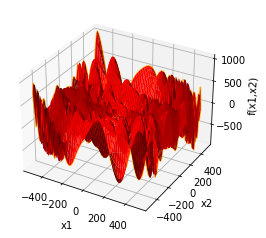

In [4]:
def plot_objective(f):
  fig=plt.figure()
  ax=plt.axes(projection='3d')
  x1=np.linspace(-512,512,100)
  x2=np.linspace(-512,512,100)
  X1,X2=np.meshgrid(x1,x2)
  ax.plot_surface(X1,X2,f(X1,X2),color='red')
  ax.plot_wireframe(X1,X2,f(X1,X2),ccount=15,rcount=15,color='orange',alpha=0.8)
  ax.set_xlabel('x1')
  ax.set_ylabel('x2')
  ax.set_zlabel('f(x1,x2)')

plot_objective(objective_eggholder)
# plot_objective(objective_levi_n13)

In [30]:
from sko.GA import GA

ga = GA(func=objective_eggholder, n_dim=2, size_pop=10, max_iter=10, prob_mut=0.001,
        lb=[-1000, -1000], ub=[1000, 1000], precision=[1, 1])
best = ga.run()
print(best)

(array([708., 724.]), array([-1361.10545338]))


(array([ 856., -747.]), array([-1337.24759351]))


In [2]:
import numpy as np
from sko.SA import SA
from sko.tools import set_run_mode

def objective_eggholder(x):
        x1, x2 = x[0], x[1]
        ## Find the global minimum [f(512, 404.2319) = -959.6407]
        a=np.sqrt(np.fabs(x2+x1/2+47))
        b=np.sqrt(np.fabs(x1-(x2+47)))
        c=-(x2+47)*np.sin(a)-x1*np.sin(b)
        return c

# set_run_mode(objective_eggholder, 'multiprocessing') # ('common', 'multithreading', 'multiprocessing')
sa = SA(func=objective_eggholder, 
        x0=[0,0], 
        T_max=1,
        T_min=1e-9,
        size_pop=100,
        lb=[-512, -512], 
        ub=[512, 512],
        precision=[1, 1])

best = sa.run()
print(best)

(array([512.        , 404.23180565]), -959.6406627208505)
